#### Introduction 
This data set contains yearly suicide detail of all the states and union territories of India by various parameters from 2001 to 2012. The objective of analyzing this dataset is to get insights on various causes of suicide which can help in better policing making and addressing social issues.

National Crime Records Bureau (NCRB), Govt of India has shared this dataset under Govt. Open Data License - India.

Description of dataset is as follows-

- Time Period: 2001 - 2012
- Granularity: Yearly
- Location: States and Union Territories of India
- Parameters:
  Suicide causes
  Education status
  By means adopted
  Professional profile
  Social status

#### Importing Libraries

In [4]:
import numpy as mp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading Data

In [5]:
data = pd.read_csv('C:/Users/COSMOS/Documents/Data_Set/Suicides in India.csv')

In [6]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


#### Understanding and cleaning the data

In [7]:
data.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

- there is no null values in data

In [8]:
data.shape

(237519, 7)

In [9]:
# droping the duplicate values from the data
data.drop_duplicates()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [10]:
data.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

- Total (All India), Total (States), Total (Uts) is of no use, so removing them.

In [11]:
data = data.drop(data[(data['State'] =='Total (All India)')].index)
data = data.drop(data[(data['State'] =='Total (States)')].index)
data = data.drop(data[(data['State'] =='Total (Uts)')].index)
data.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [12]:
data.Year.unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012], dtype=int64)

In [13]:
data.Type_code.unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

In [14]:
data.Type.unique()

array(['Illness (Aids/STD)', 'Bankruptcy or Sudden change in Economic',
       'Cancellation/Non-Settlement of Marriage',
       'Physical Abuse (Rape/Incest Etc.)', 'Dowry Dispute',
       'Family Problems', 'Ideological Causes/Hero Worshipping',
       'Other Prolonged Illness', 'Property Dispute',
       'Fall in Social Reputation', 'Illegitimate Pregnancy',
       'Failure in Examination', 'Insanity/Mental Illness',
       'Love Affairs', 'Professional/Career Problem', 'Divorce',
       'Drug Abuse/Addiction', 'Not having Children(Barrenness/Impotency',
       'Causes Not known', 'Unemployment',
       'Other Causes (Please Specity)', 'Poverty', 'Death of Dear Person',
       'Cancer', 'Suspected/Illicit Relation', 'Paralysis', 'Diploma',
       'No Education', 'Post Graduate and Above', 'Middle', 'Graduate',
       'Hr. Secondary/Intermediate/Pre-Universit', 'Primary',
       'Matriculate/Secondary', 'By Consuming Insecticides', 'By Hanging',
       'By Jumping from (Other sites)'

- Here 'Bankruptcy or Sudden change in Economic Status' and 'Bankruptcy or Sudden change in Economic' are in different entires but they are the same thing, so we will combine them together.
- There are entries like 'By Other means','Other Causes','Causes not known' etc. which does not give much info so, drop them 

In [112]:
data['Type'] = data['Type'].replace('Bankruptcy or Sudden change in Economic','Bankruptcy or Sudden change in Economic Status')

# remove entries that don't provide much information
data = data[~data['Type'].isin(['By Other means', 'Other Causes (Please Specity)','Others (Please Specify)' ,'Causes Not known'])]

In [113]:
# removing all rows whose total is 0
data = data.drop(data[data['Total']==0].index)

In [114]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
69,A & N Islands,2001,Causes,Family Problems,Female,15-29,5


In [115]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [116]:
data.Age_group.unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

In [117]:
data[data['Age_group'] ==  '0-100+']

,State,Year,Type_code,Type,Gender,Age_group,Total
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
266,A & N Islands,2001,Education_Status,Primary,Female,0-100+,7
267,A & N Islands,2001,Education_Status,Matriculate/Secondary,Female,0-100+,6
268,A & N Islands,2001,Education_Status,Matriculate/Secondary,Male,0-100+,10
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


- There are over 8951 data points with age group = 0-100+. So we will make two dataframe, one with this age group where age group is not be analyzed (this datframe is data), and one without this group where age group is to be analyzed to remove ambiguity.(this dataframe will be data_wa)


In [118]:
data_wa = data[data['Age_group'] != '0-100+']
data_wa

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
69,A & N Islands,2001,Causes,Family Problems,Female,15-29,5
...,...,...,...,...,...,...,...
237393,West Bengal,2012,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,60+,7
237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,60+,53
237395,West Bengal,2012,Means_adopted,By Other means (please specify),Male,60+,241
237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,60+,99


### Analyzing Data

##### State wise

In [119]:
data_state = data.groupby('State').sum().Total.sort_values(ascending=False)
data_state  
# using Total to store value in 1D, if not using Total than data will we groupby in 2D and ploting would not be done

State
Maharashtra          855749
West Bengal          734118
Tamil Nadu           716281
Andhra Pradesh       714309
Karnataka            613986
Kerala               473619
Madhya Pradesh       397546
Gujarat              298101
Chhattisgarh         244476
Odisha               217002
Rajasthan            211018
Uttar Pradesh        205965
Assam                146244
Haryana              119992
Delhi (Ut)            72652
Jharkhand             40955
Punjab                40679
Tripura               39139
Bihar                 37547
Puducherry            30404
Himachal Pradesh      22451
Uttarakhand           16274
Goa                   15247
Jammu & Kashmir       12288
Sikkim                 8253
A & N Islands          7251
Arunachal Pradesh      5309
Chandigarh             4632
Meghalaya              4464
Mizoram                3241
D & N Haveli           3155
Manipur                1662
Nagaland               1356
Daman & Diu            1096
Lakshadweep              45
Name: Total, d

Text(0.5, 1.0, 'Suicide stat State-Wise')

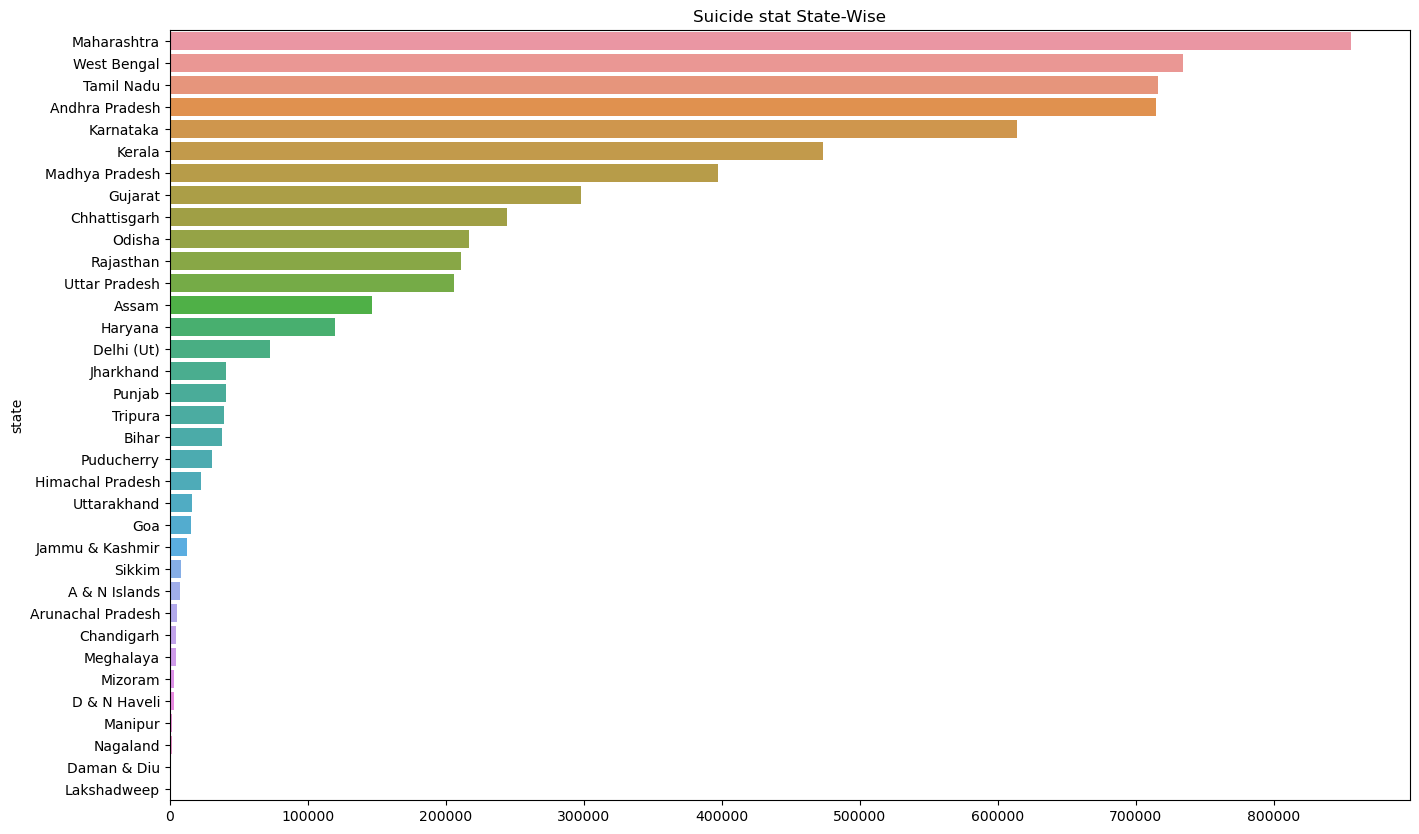

In [120]:
plt.figure(figsize=(16,10))
sns.barplot(x=data_state.values, y=data_state.index, orient='h')
plt.ylabel('state')
plt.title('Suicide stat State-Wise')

##### Age wise

In [121]:
data_age = data_wa.groupby('Age_group').sum()
data_age

,Year,Total
Age_group,,
0-14,15411826,65776
15-29,44442952,1236027
30-44,42809494,1156393
45-59,34569374,684699
60+,23371036,261749


Text(0.5, 1.0, 'Suicides per Age group')

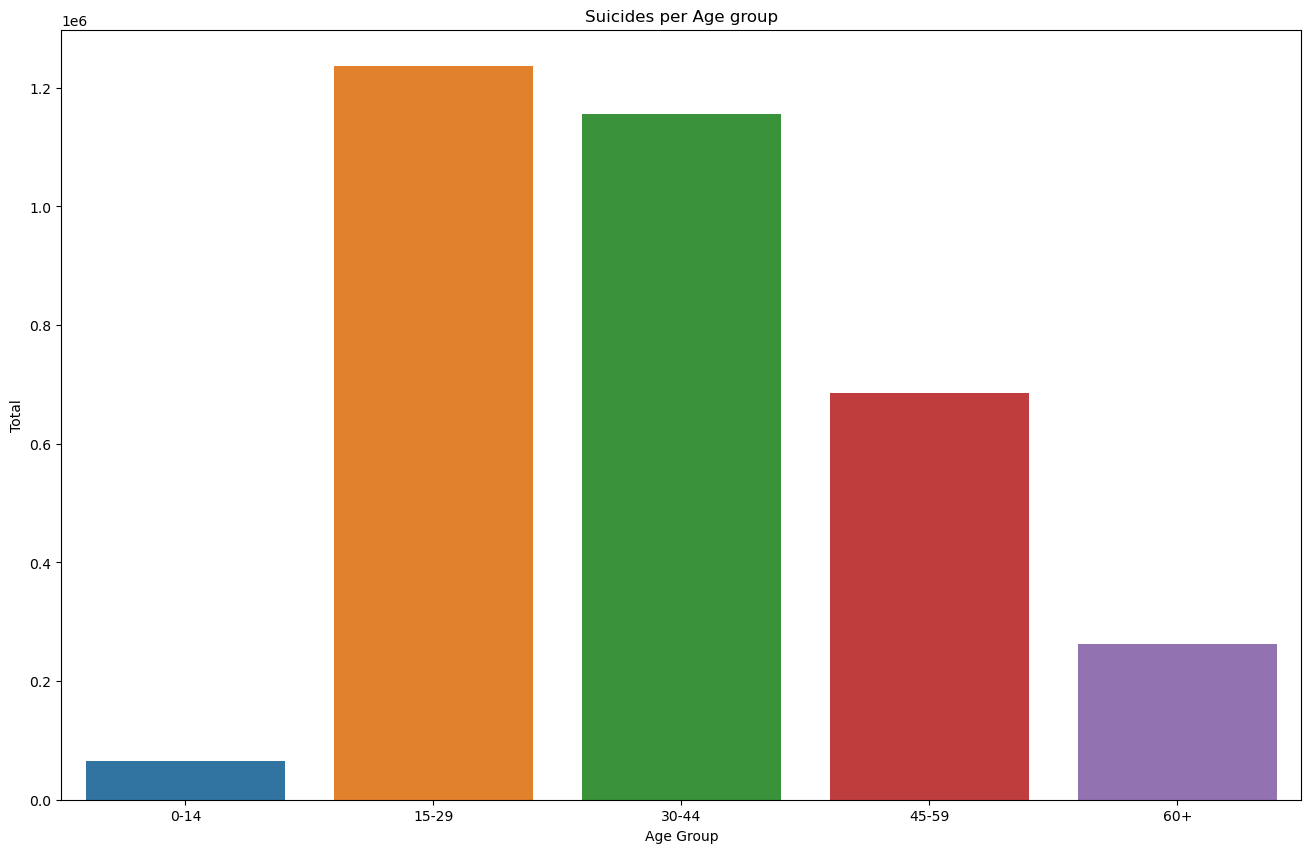

In [122]:
plt.figure(figsize=(16,10))
sns.barplot(x=data_age.index,y=data_age.Total)
plt.xlabel('Age Group')
plt.title('Suicides per Age group')

Text(0.5, 1.0, 'Suicides per age Group')

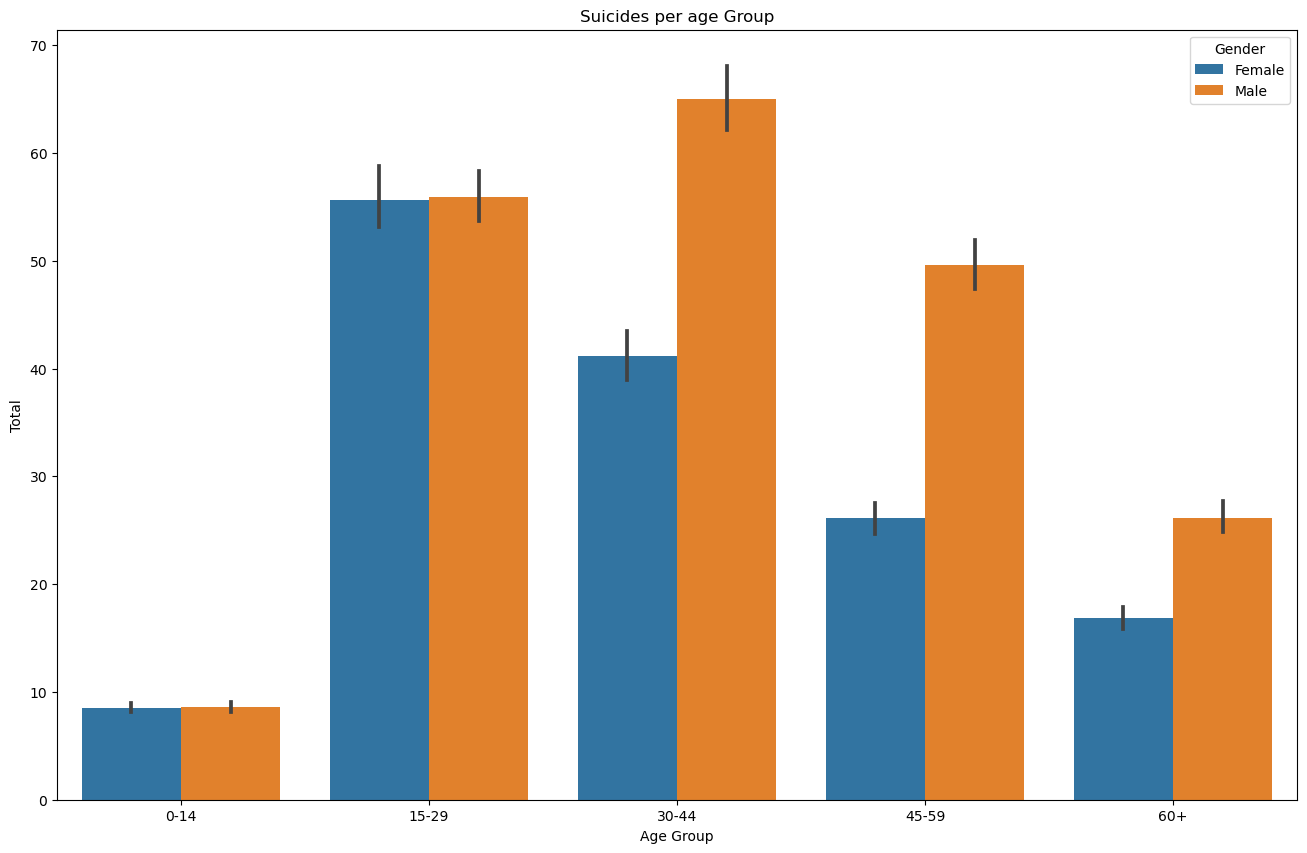

In [123]:
plt.figure(figsize=(16,10))
sns.barplot(x=data_wa.Age_group, y=data_wa.Total, hue='Gender', data=data_wa)
plt.xlabel('Age Group')
plt.title('Suicides per age Group')

In [124]:
data_wa.head(1)

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1


#### Year wise

Text(0.5, 1.0, 'Suicides per Year')

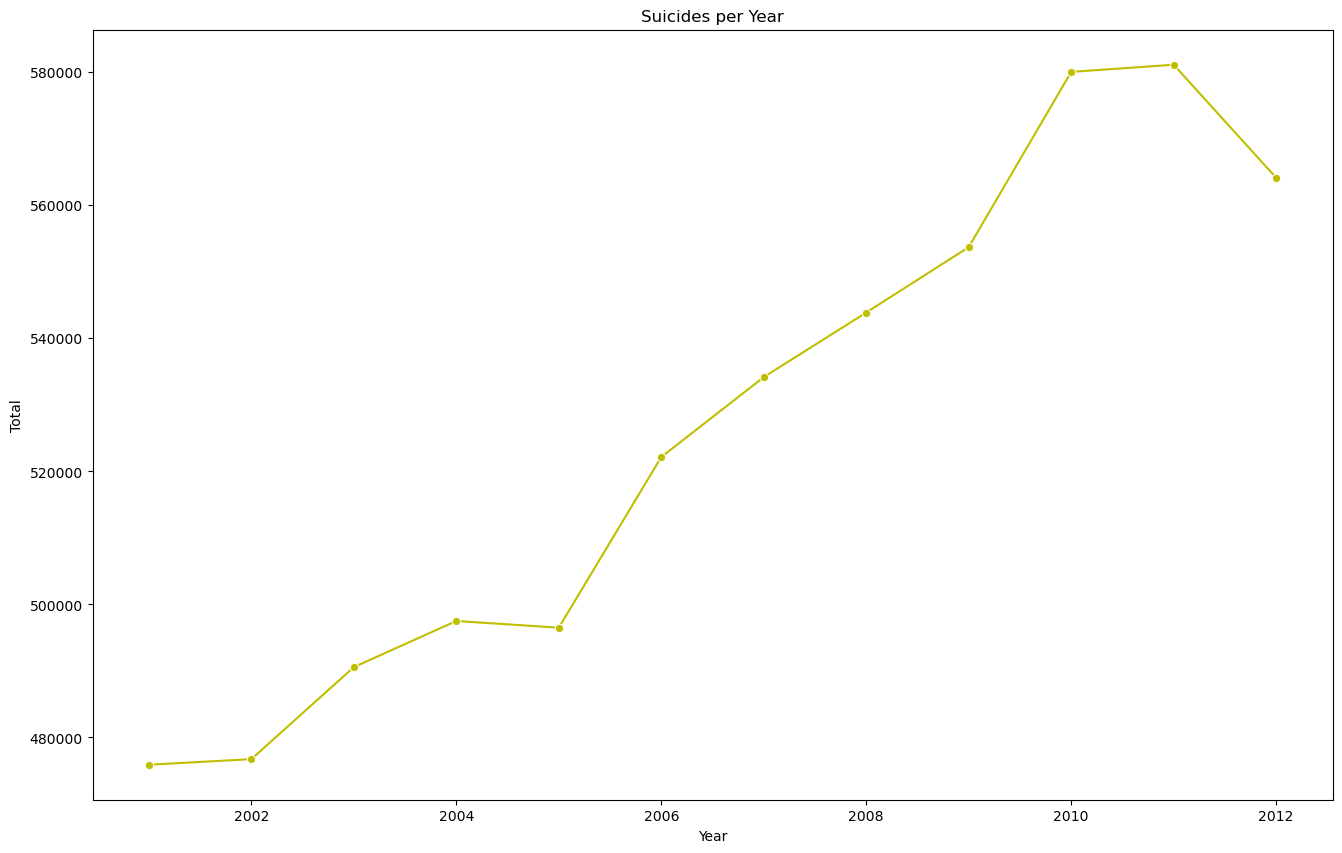

In [125]:
plt.figure(figsize=(16,10))
data_year = data.groupby('Year').sum().Total
sns.lineplot(x=data_year.index, y=data_year.values, marker='o', color='y')
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Suicides per Year')

In [126]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
69,A & N Islands,2001,Causes,Family Problems,Female,15-29,5


#### Type Wise

<AxesSubplot:ylabel='Type'>

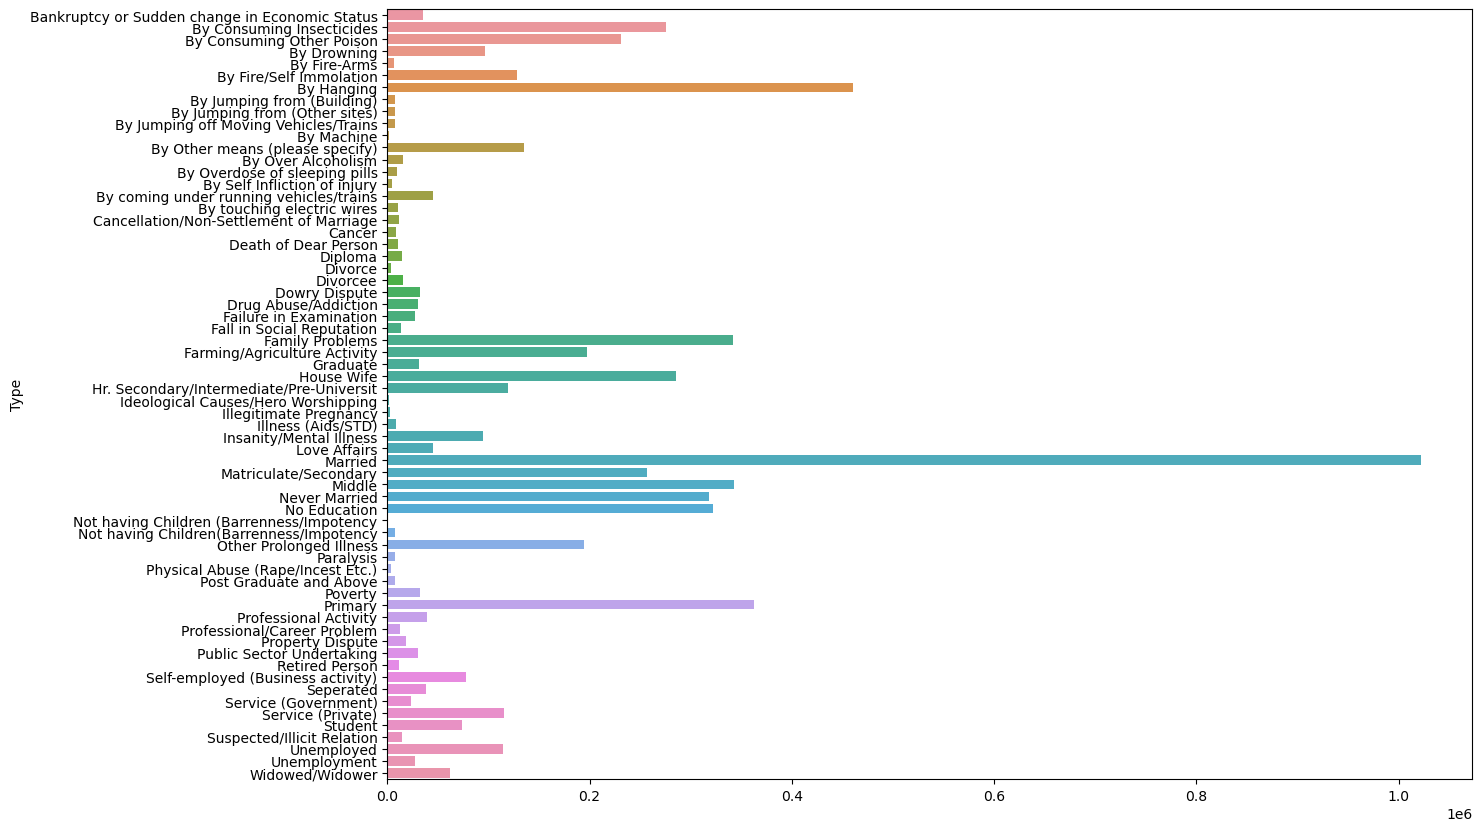

In [127]:
plt.figure(figsize=(14,10))
data_type = data.groupby('Type').sum().Total
sns.barplot(y=data_type.index, x=data_type.values)

#### Type Wise and State

In [128]:
data.Type_code.unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

Text(0, 0.5, 'Total')

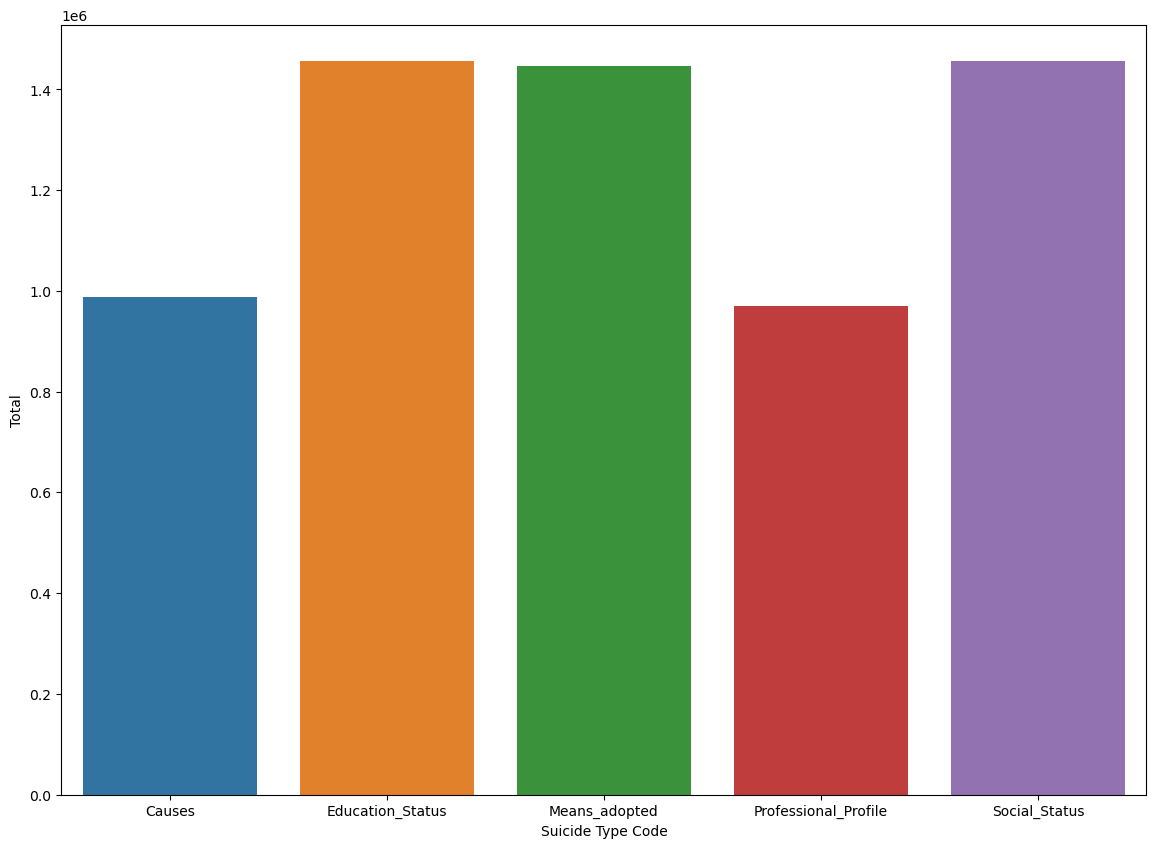

In [129]:
plt.figure(figsize=(14,10))
data_tc = data.groupby('Type_code').sum().Total
sns.barplot(x=data_tc.index, y=data_tc.values)
plt.xlabel("Suicide Type Code")
plt.ylabel('Total')

###### Analyzing these type code individually

1. Causes

In [130]:
data_cs = data[data['Type_code']=='Causes']
data_cs_total = data_cs.groupby('Type').sum().Total
data_cs_total = data_cs_total.sort_values(ascending=False)

<AxesSubplot:ylabel='Type'>

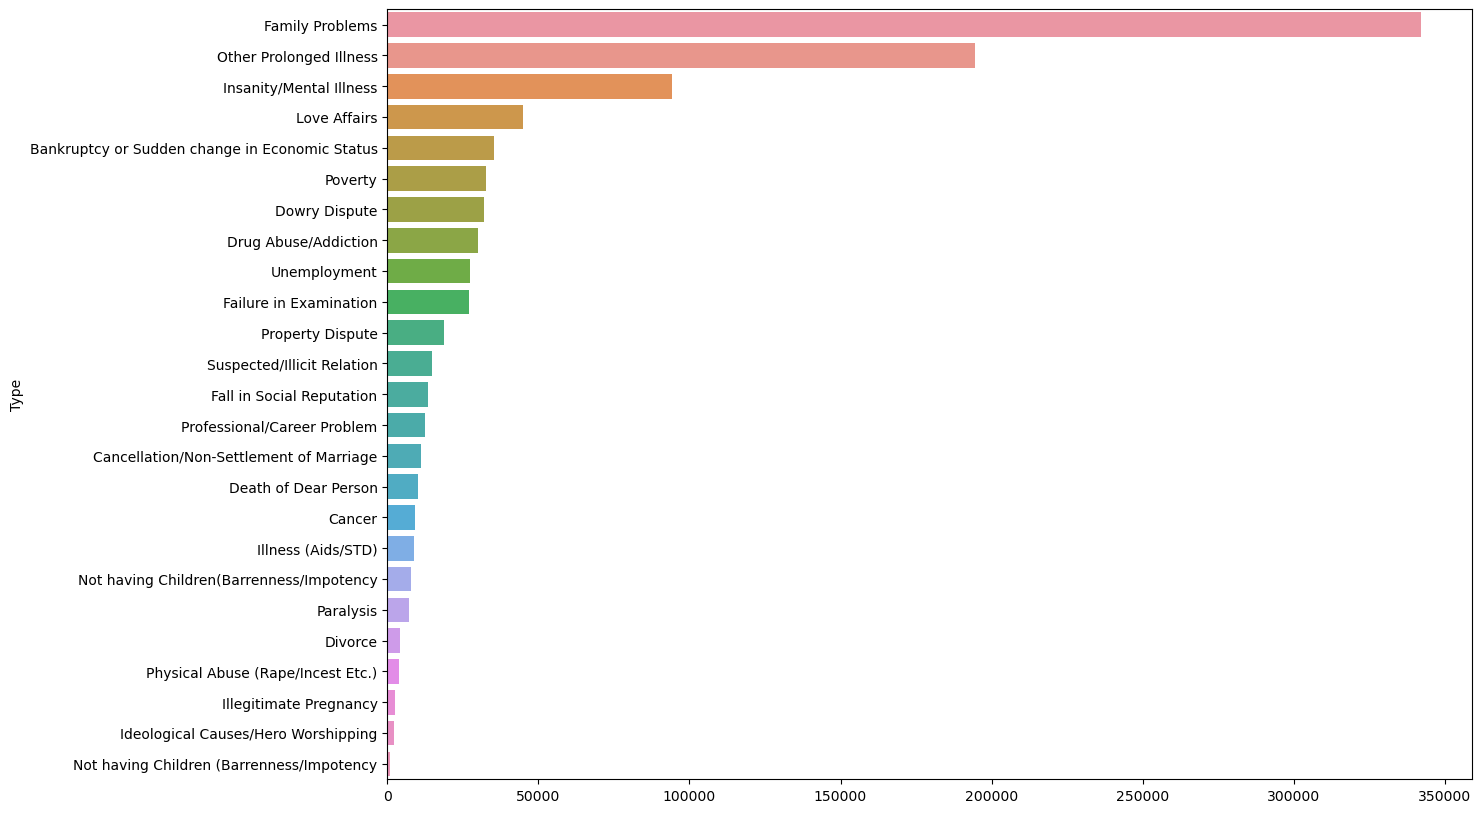

In [131]:
plt.figure(figsize=(14,10))
sns.barplot(x=data_cs_total.values, y=data_cs_total.index)

Family Problem and prolonged illness are two are the major causes.

2. Educational Status

In [139]:
data_es = data[data['Type_code']=='Education_Status']
data_es_total = data_es.groupby('Type').sum().Total
data_es_total = data_es_total.sort_values(ascending=False)

<AxesSubplot:ylabel='Type'>

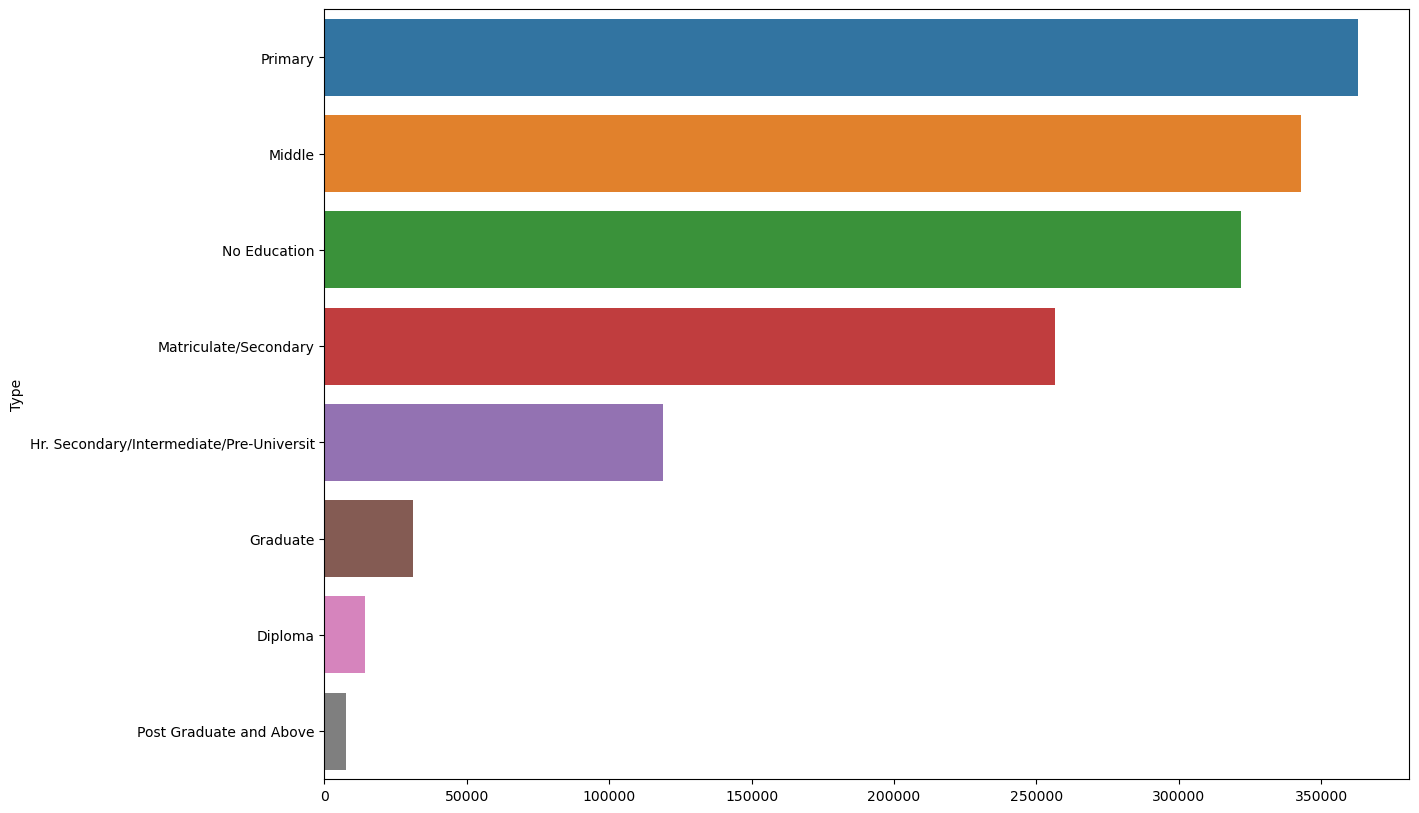

In [140]:
plt.figure(figsize=(14,10))
sns.barplot(x=data_es_total.values, y=data_es_total.index)

Those who who studied till Primary and, middle school have high suicide rates as compared who studied till PG or have done diploma

3. Means Adopted

In [143]:
data_ma = data[data['Type_code']=='Means_adopted']
data_ma_total = data_ma.groupby('Type').sum().Total
data_ma_total = data_ma_total.sort_values(ascending=False)
data_ma_total

Type
By Hanging                                 460955
By Consuming Insecticides                  275501
By Consuming Other Poison                  231178
By Other means (please specify)            135132
By Fire/Self Immolation                    128006
By Drowning                                 96711
By coming under running vehicles/trains     45299
By Over Alcoholism                          15973
By touching electric wires                  10816
By Overdose of sleeping pills                9960
By Jumping from (Other sites)                8127
By Jumping off Moving Vehicles/Trains        8116
By Jumping from (Building)                   7871
By Fire-Arms                                 6294
By Self Infliction of injury                 5093
By Machine                                   1661
Name: Total, dtype: int64

<AxesSubplot:ylabel='Type'>

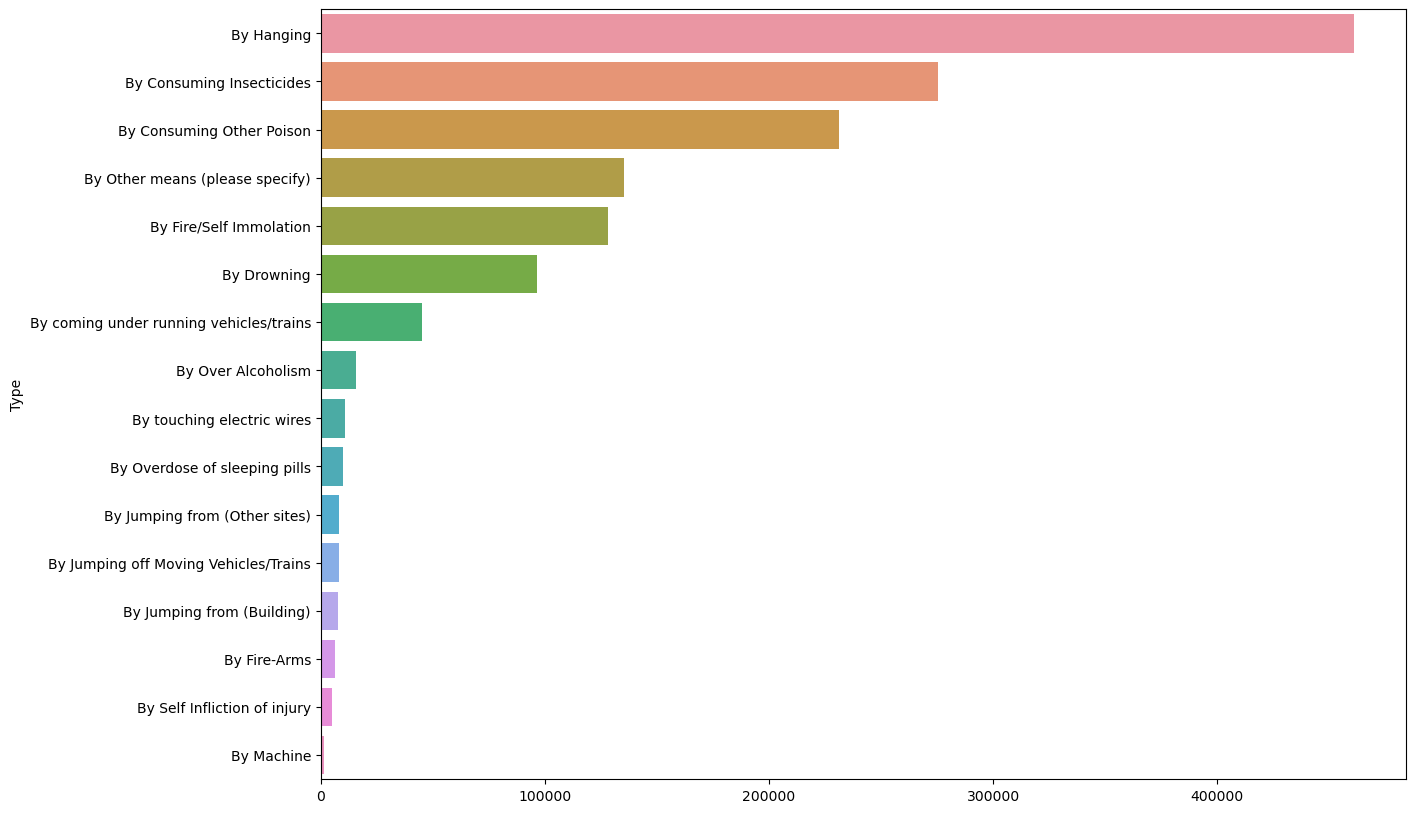

In [144]:
plt.figure(figsize=(14,10))
sns.barplot(x=data_ma_total.values, y=data_ma_total.index)

Above bar plot shows that most of the suicide are committed by hanging, by consuming insecticides followed by poison.

4. Professional Profile

In [152]:
data_pp = data[data['Type_code']=='Professional_Profile']
data_pp_total = data_pp.groupby('Type').sum().Total
data_pp_total = data_pp_total.sort_values(ascending=False)
data_pp_total

Type
House Wife                           285243
Farming/Agriculture Activity         197923
Service (Private)                    115472
Unemployed                           114374
Self-employed (Business activity)     78112
Student                               74323
Professional Activity                 39204
Public Sector Undertaking             30786
Service (Government)                  23325
Retired Person                        11334
Name: Total, dtype: int64

<AxesSubplot:ylabel='Type'>

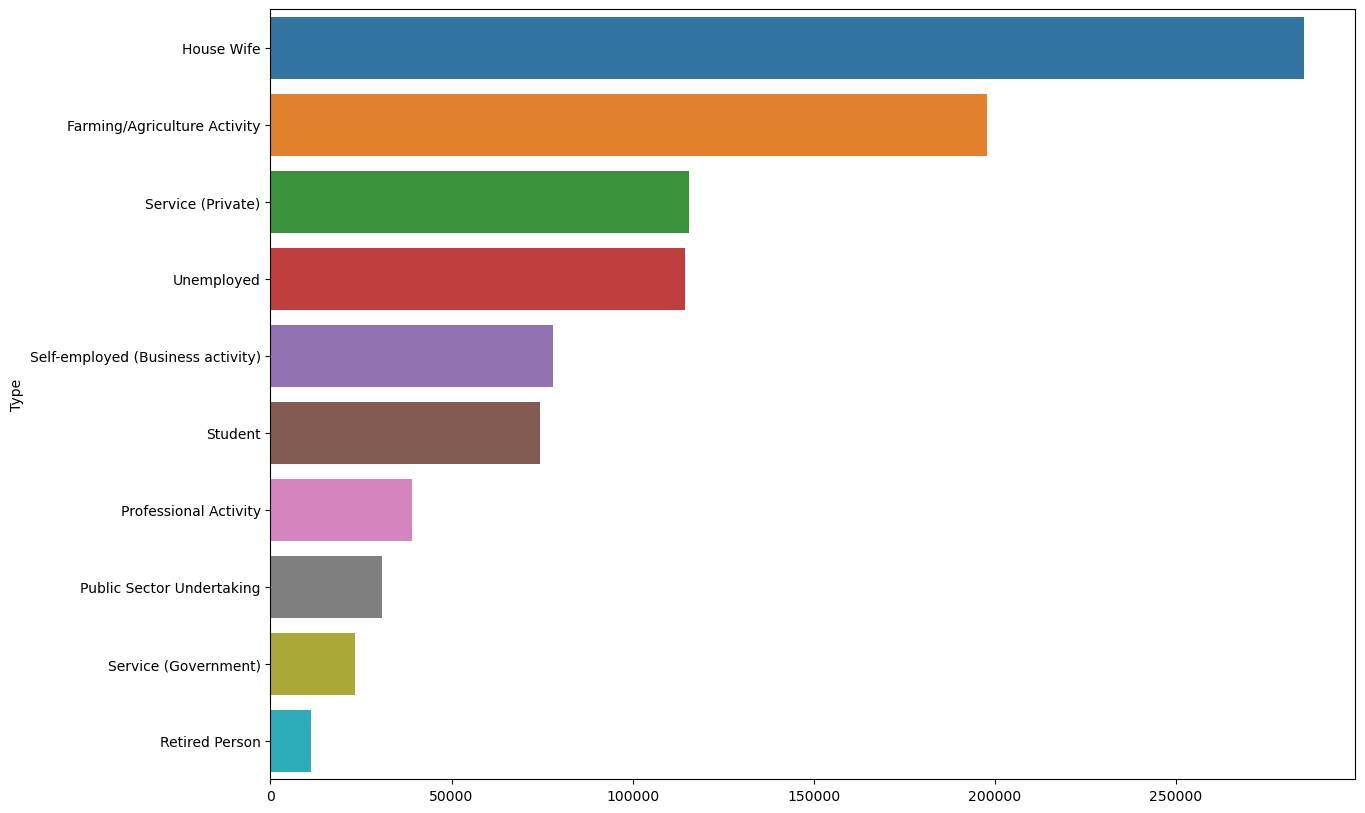

In [153]:
plt.figure(figsize=(14,10))
sns.barplot(x=data_pp_total.values, y=data_pp_total.index)

5. Social Status

In [154]:
data_ss = data[data['Type_code']=='Social_Status']
data_ss_total = data_ss.groupby('Type').sum().Total
data_ss_total = data_ss_total.sort_values(ascending=False)
data_ss_total

Type
Married            1021774
Never Married       318301
Widowed/Widower      62113
Seperated            38471
Divorcee             15272
Name: Total, dtype: int64

<AxesSubplot:ylabel='Type'>

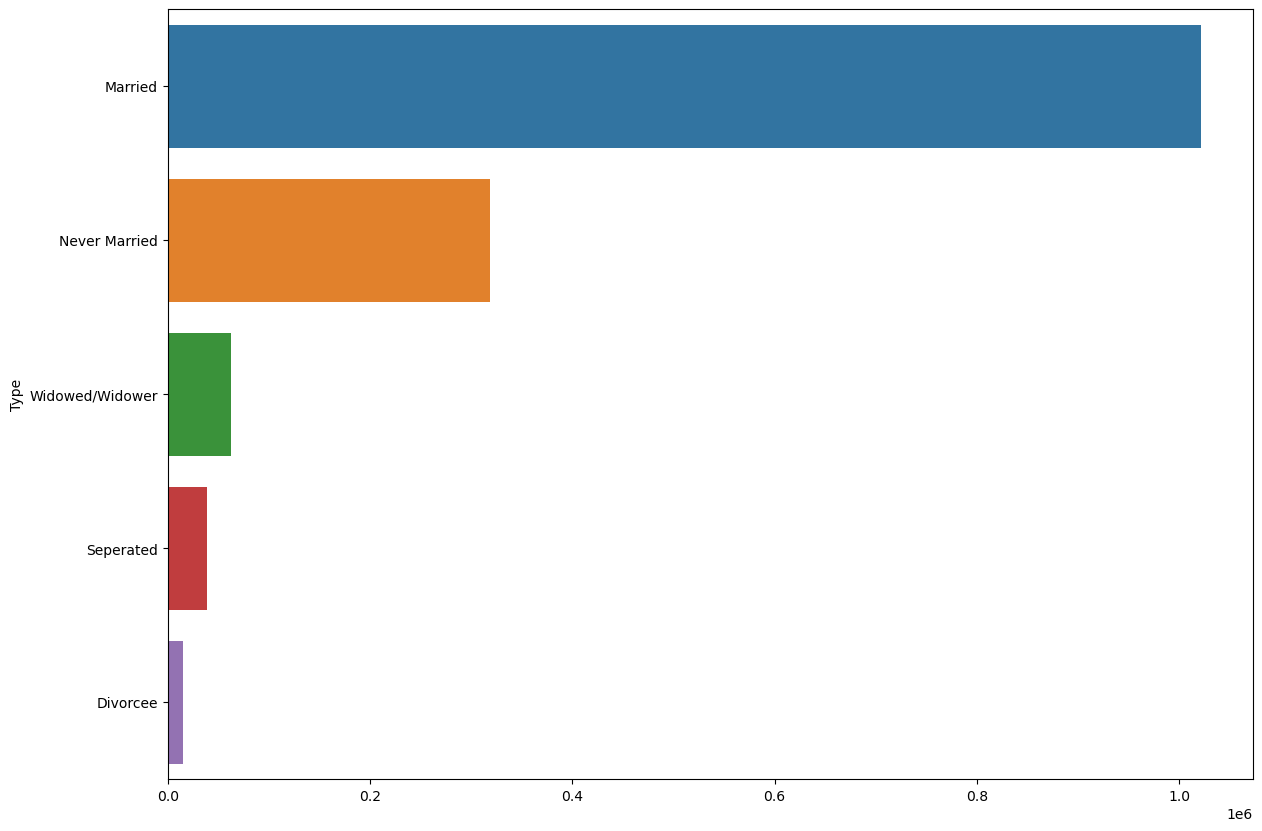

In [155]:
plt.figure(figsize=(14,10))
sns.barplot(x=data_ss_total.values, y=data_ss_total.index)

Insights from the data we extracted are:
- Based on demography, Maharashtra had most suicide count.
- Between age 15 and 44 group, there isn't a significant difference in suicide count.
- Suicide in males is more than females in almost every age group. But there isn't much diferent in age group 15 to 29.
- Number of Suicides are increasing every year, which is of great concern and needsto be addressed.
- By professional profile, housewives are most vulnerable which also correlates with data showing married committed more suicide.
- Another vulnerable group in professional profile is agriculture sector. Top 5 states in most farmer suicides are- Maharashtra, Andhra Pradesh, Karnataka, Madhya Pradesh and Chattisgarh.
- Data shows that higher the education status lower the suicide count.